MOUNTING WITH GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing all the Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes =True)
import pickle
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from  sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Importing the Dataset

In [ ]:
data = pd.read_csv("/content/drive/My Drive/diabetes.csv")

Preview of Dataset

In [ ]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**EDA**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Removal of Zeros**\
\
Since there are many zeros in data and values of 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' cannot be zero,
Therefore, Converiting Zeros into NaN value

In [ ]:
data_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
data[data_zeros] = np.where((data[data_zeros] == 0), np.nan, data[data_zeros])

In [ ]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Handling Missing Values**\
\
Filling NaN values with suitable mean and median values

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())
# data.isnull().sum()

data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())
# data.isnull().sum()

print("Skin thickness ", data['SkinThickness'].mean(), data['SkinThickness'].median())

data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())
# data.isnull().sum()

print("insulin " ,data['Insulin'].mean(), data['Insulin'].median())

data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())
# data.isnull().sum()

print("bmi " ,data['BMI'].mean(), data['BMI'].median())

data['BMI'] = data['BMI'].fillna(data['BMI'].median())
# data.isnull().sum()

Skin thickness  29.153419593345657 29.0
insulin  155.5482233502538 125.0
bmi  32.45746367239099 32.3


In [ ]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,29.0,125.0,32.3,0.232,54,1


NEW UPDATED DATASET

In [ ]:
data.to_csv(r'updates_dataset.csv')

**Pair Plot to see Distribution of all data at a time and dependencies**

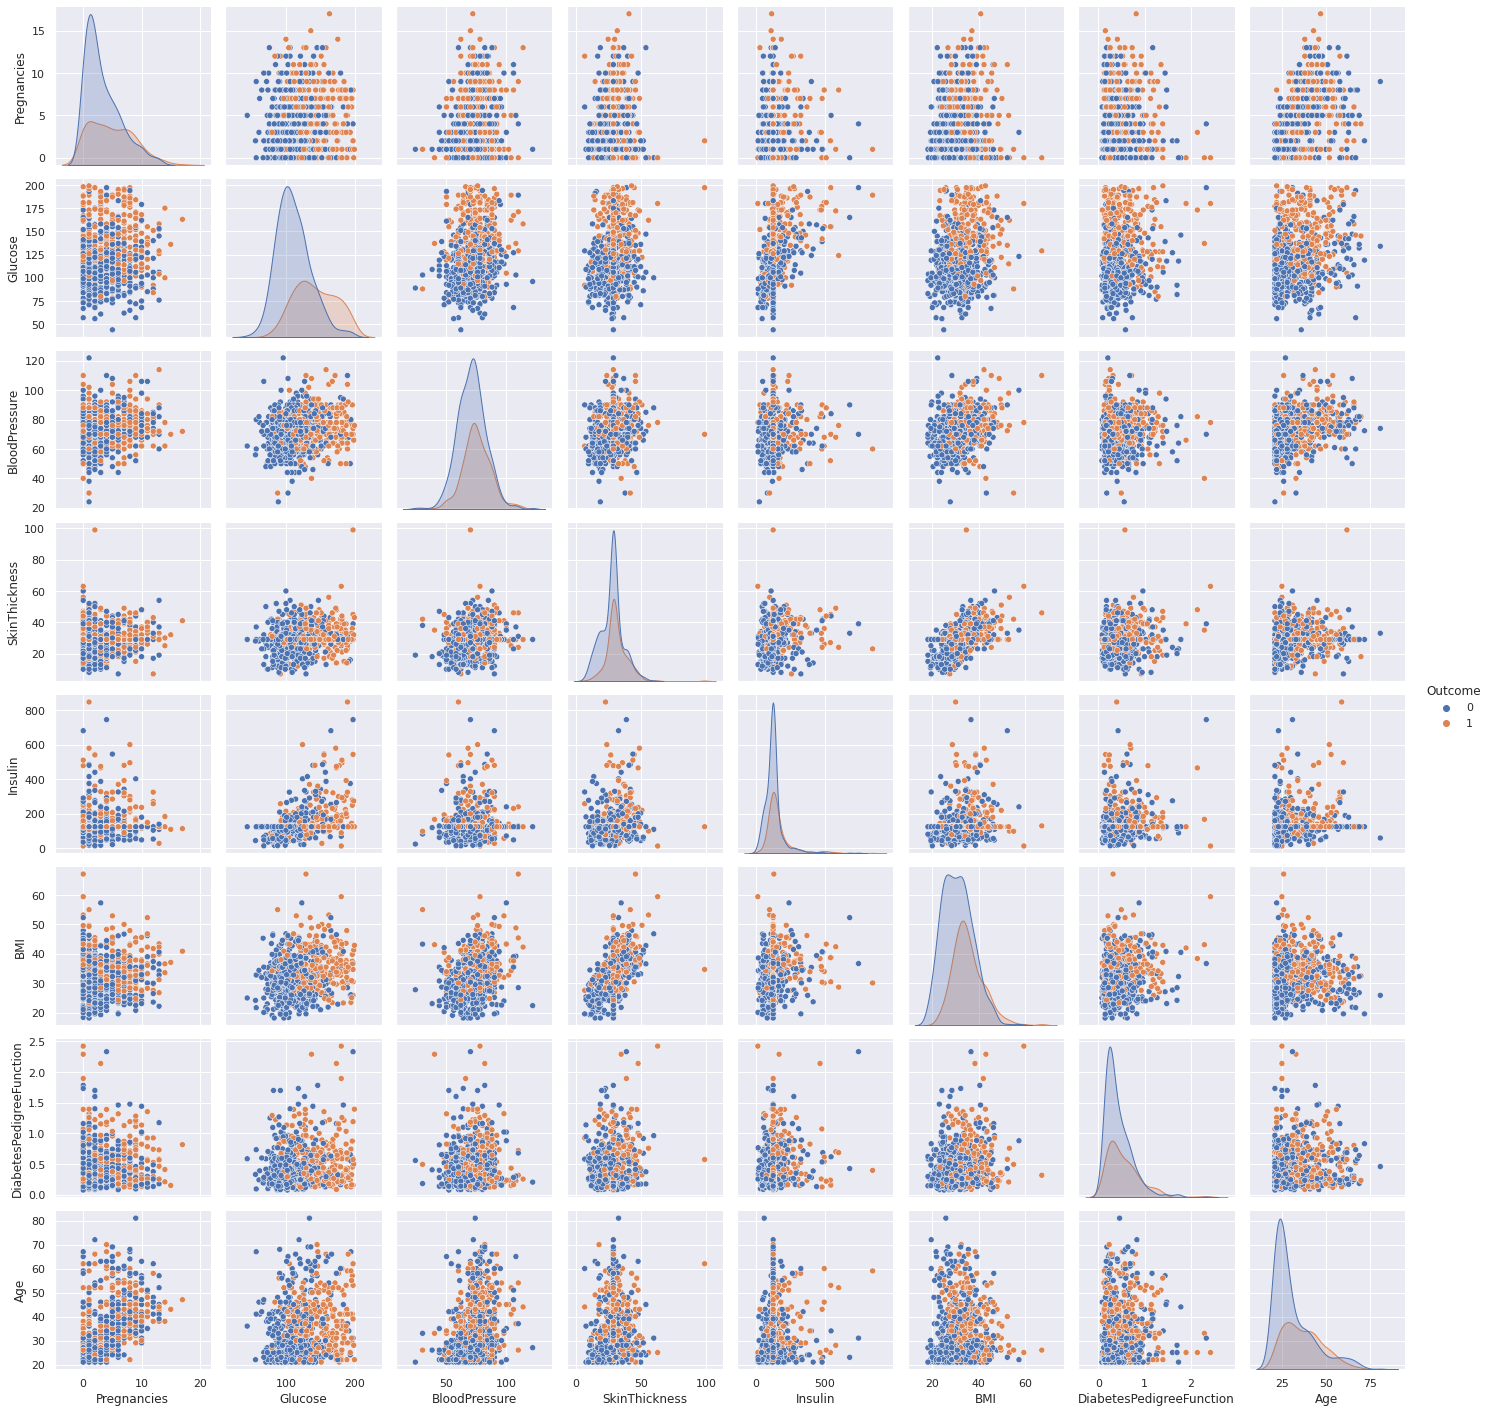

In [ ]:
sns.pairplot(data =data, hue = 'Outcome')
plt.show()

**Heat Map**\
\
Gives Relation of different attribute with each other

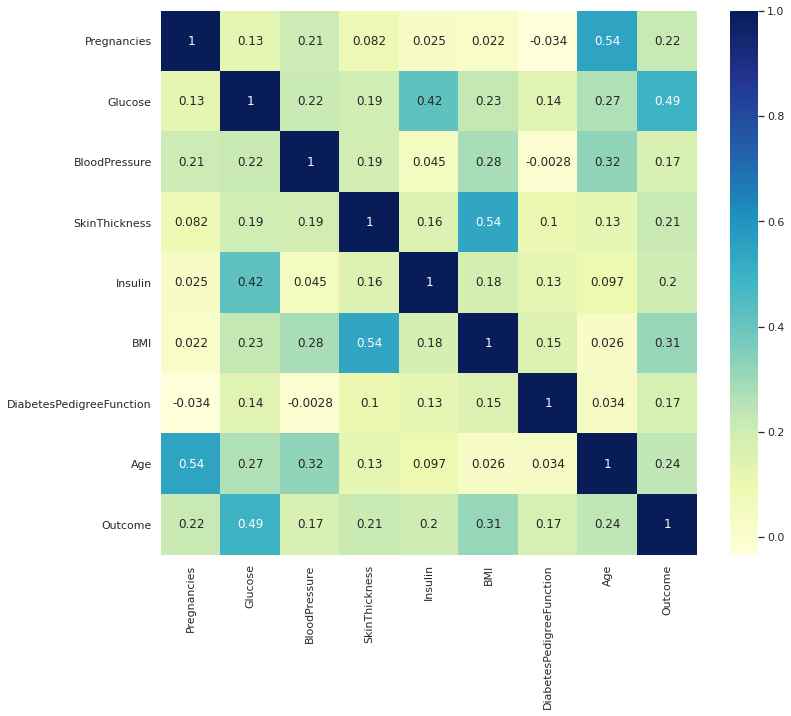

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

PLOTTING HISTOGRAM AND BOX PLOT FOR ALL ATRRIBUTES

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

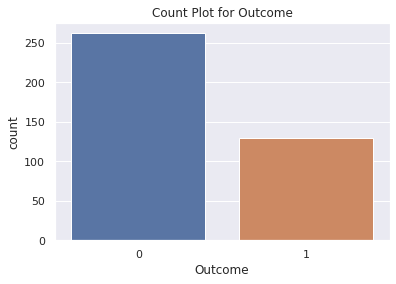

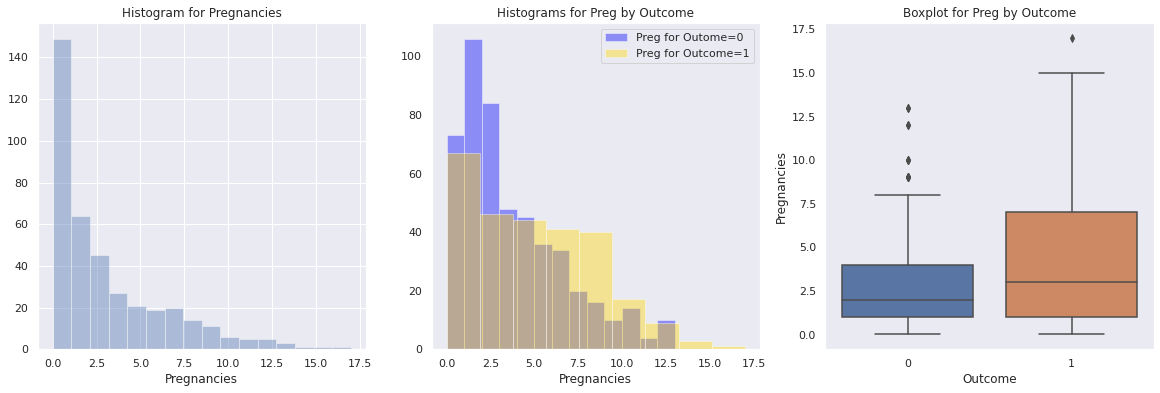

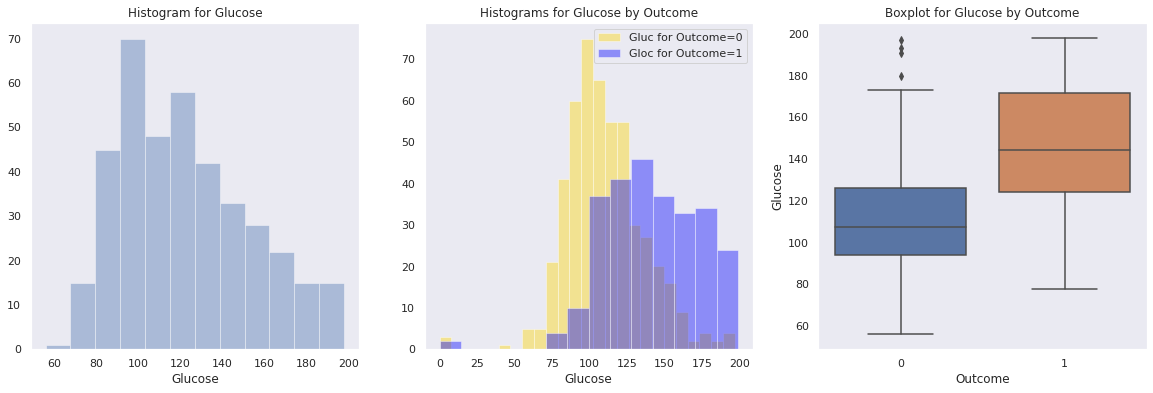

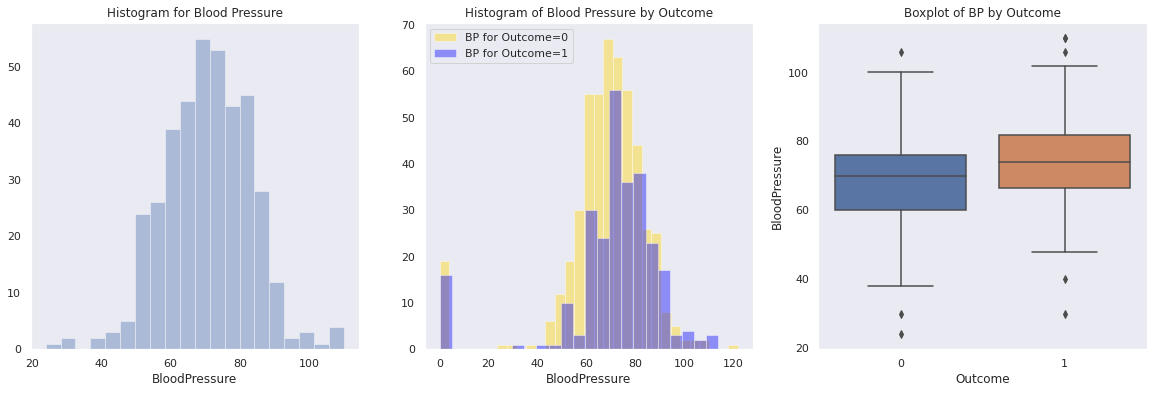

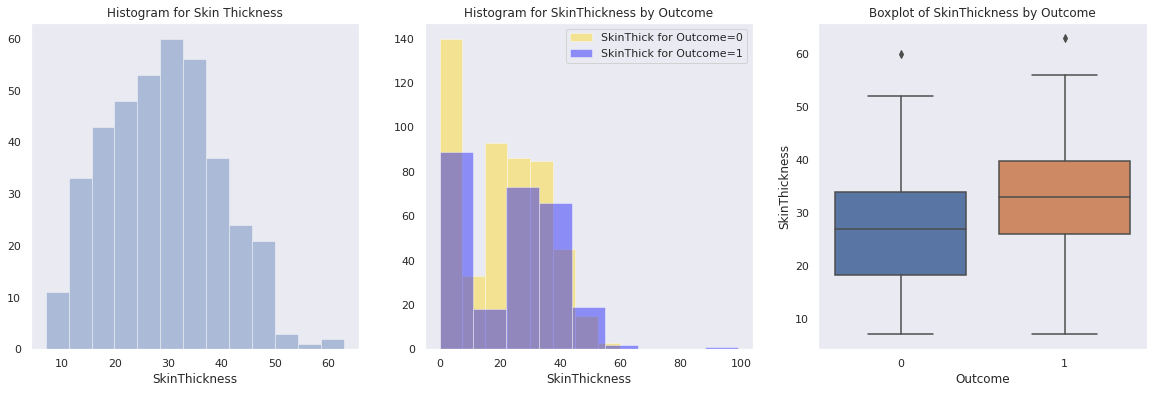

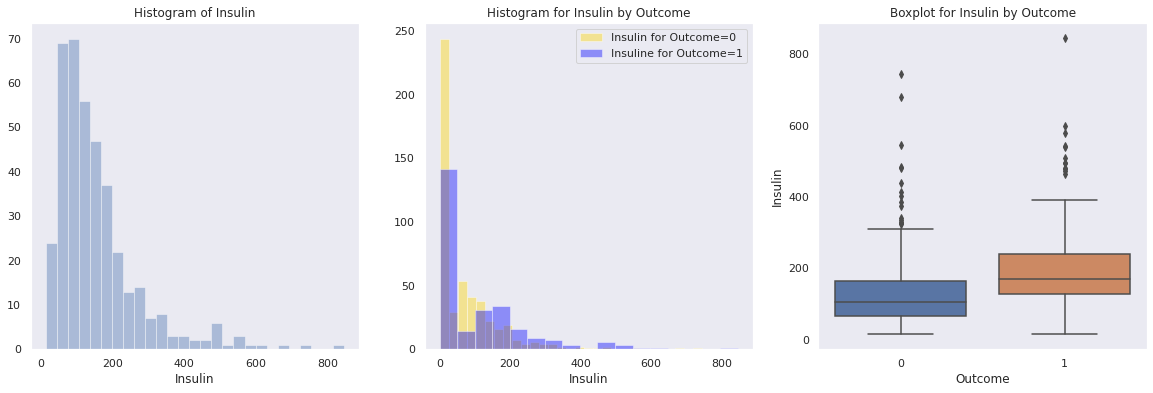

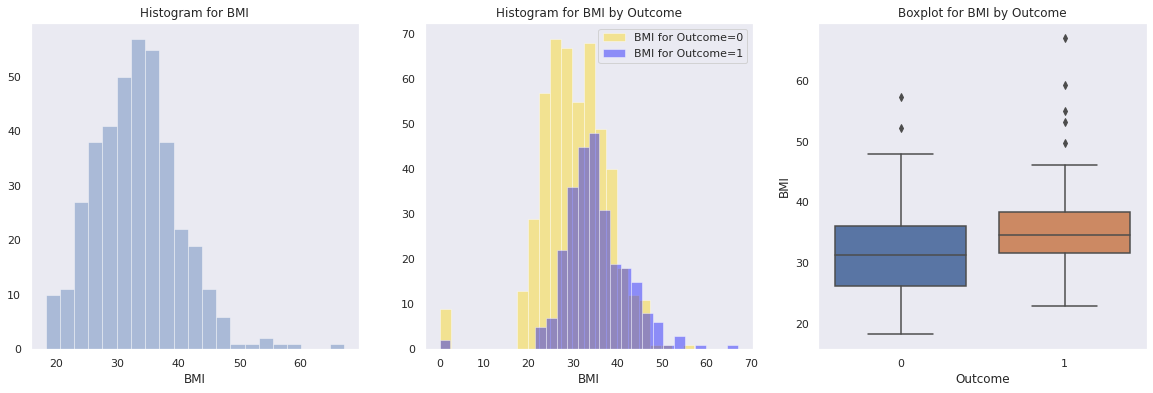

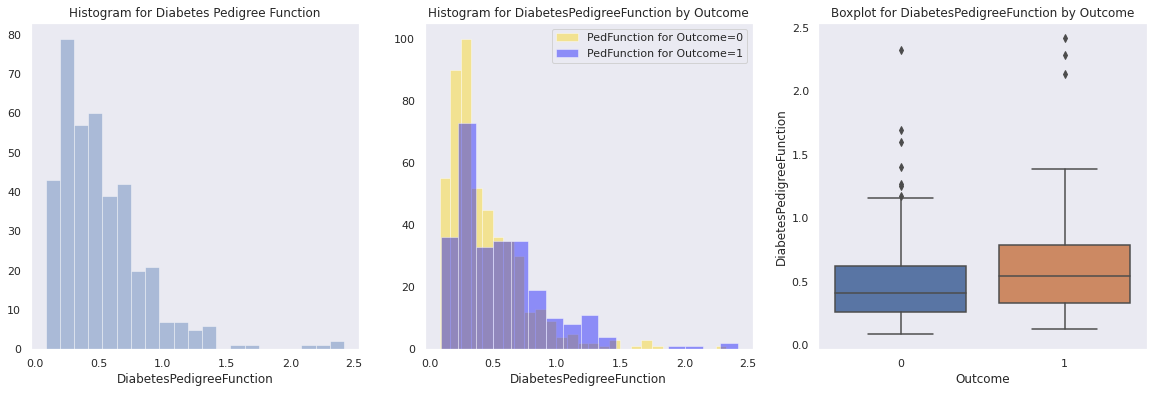

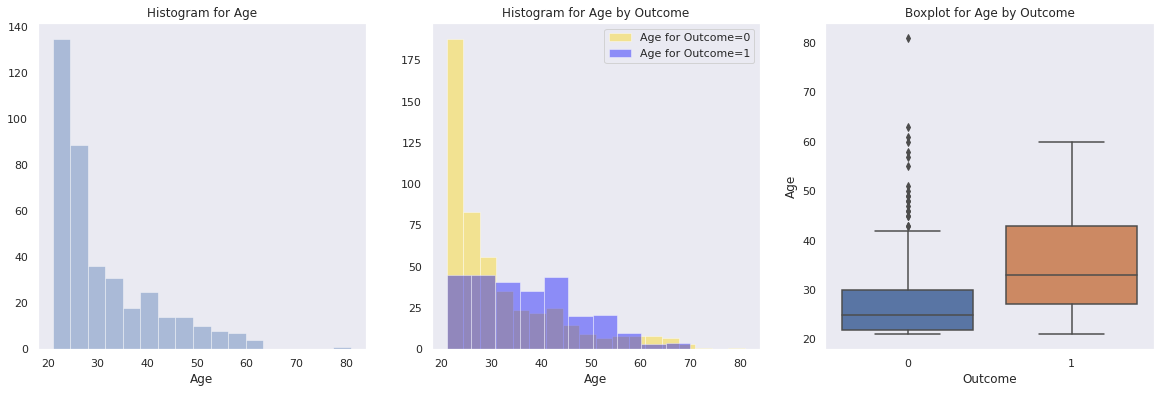

In [ ]:
dia=pd.read_csv("/content/drive/My Drive/diabetes.csv")
diab=pd.read_csv("/content/drive/My Drive/diabetes.csv")
#
dia1 = dia[dia.Outcome==1]
dia0 = dia[dia.Outcome==0]
diab.describe()
#
## Creating a dataset called 'dia' from original dataset 'diab' with excludes all rows with have zeros only for Glucose, BP, Skinthickness, Insulin and BMI, as other columns can contain Zero values.
drop_Glu=diab.index[diab.Glucose == 0].tolist()
drop_BP=diab.index[diab.BloodPressure == 0].tolist()
drop_Skin = diab.index[diab.SkinThickness==0].tolist()
drop_Ins = diab.index[diab.Insulin==0].tolist()
drop_BMI = diab.index[diab.BMI==0].tolist()
c=drop_Glu+drop_BP+drop_Skin+drop_Ins+drop_BMI
dia=diab.drop(diab.index[c])
#
## creating count plot with title using seaborn
sns.countplot(x=dia.Outcome)
plt.title("Count Plot for Outcome")
#
# Computing the %age of diabetic and non-diabetic in the sample
Out0=len(dia[dia.Outcome==1])
Out1=len(dia[dia.Outcome==0])
Total=Out0+Out1
PC_of_1 = Out1*100/Total
PC_of_0 = Out0*100/Total
PC_of_1, PC_of_0

#PREGNANCY
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Pregnancies")
sns.distplot(dia.Pregnancies,kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sns.distplot(dia1.Pregnancies,kde=False,color = "Gold", label = "Preg for Outcome=1")
plt.title("Histograms for Preg by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Pregnancies)
plt.title("Boxplot for Preg by Outcome")
plt.savefig("pregnancy.png")
#
#GLUCOSE
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title("Histogram for Glucose")
sns.distplot(dia.Glucose, kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.Glucose,kde=False,color="Gold", label="Gluc for Outcome=0")
sns.distplot(dia1.Glucose, kde=False, color="Blue", label = "Gloc for Outcome=1")
plt.title("Histograms for Glucose by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Glucose)
plt.title("Boxplot for Glucose by Outcome")
plt.savefig("glucose.png")
#
#BLOOD PRESSURE
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.BloodPressure, kde=False)
plt.title("Histogram for Blood Pressure")
plt.subplot(1,3,2)
sns.distplot(dia0.BloodPressure,kde=False,color="Gold",label="BP for Outcome=0")
sns.distplot(dia1.BloodPressure,kde=False, color="Blue", label="BP for Outcome=1")
plt.legend()
plt.title("Histogram of Blood Pressure by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.BloodPressure)
plt.title("Boxplot of BP by Outcome")
plt.savefig("bloodpressure.png")
#
#SKIN THICKNESS
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.SkinThickness, kde=False)
plt.title("Histogram for Skin Thickness")
plt.subplot(1,3,2)
sns.distplot(dia0.SkinThickness, kde=False, color="Gold", label="SkinThick for Outcome=0")
sns.distplot(dia1.SkinThickness, kde=False, color="Blue", label="SkinThick for Outcome=1")
plt.legend()
plt.title("Histogram for SkinThickness by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.SkinThickness)
plt.title("Boxplot of SkinThickness by Outcome")
plt.savefig("skinthickness.png")
#
#INSULIN
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.Insulin,kde=False)
plt.title("Histogram of Insulin")
plt.subplot(1,3,2)
sns.distplot(dia0.Insulin,kde=False, color="Gold", label="Insulin for Outcome=0")
sns.distplot(dia1.Insulin,kde=False, color="Blue", label="Insuline for Outcome=1")
plt.title("Histogram for Insulin by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.Insulin)
plt.title("Boxplot for Insulin by Outcome")
plt.savefig("insulin.png")
#
#BODY-MASS-INDEX
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.BMI, kde=False)
plt.title("Histogram for BMI")
plt.subplot(1,3,2)
sns.distplot(dia0.BMI, kde=False,color="Gold", label="BMI for Outcome=0")
sns.distplot(dia1.BMI, kde=False, color="Blue", label="BMI for Outcome=1")
plt.legend()
plt.title("Histogram for BMI by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.BMI)
plt.title("Boxplot for BMI by Outcome")
plt.savefig("BMI.png")
#
#DIABETES PEDIGREE FUNCTION
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.DiabetesPedigreeFunction,kde=False)
plt.title("Histogram for Diabetes Pedigree Function")
plt.subplot(1,3,2)
sns.distplot(dia0.DiabetesPedigreeFunction, kde=False, color="Gold", label="PedFunction for Outcome=0")
sns.distplot(dia1.DiabetesPedigreeFunction, kde=False, color="Blue", label="PedFunction for Outcome=1")
plt.legend()
plt.title("Histogram for DiabetesPedigreeFunction by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.DiabetesPedigreeFunction)
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")
plt.savefig("diapedifun.png")
#
#AGE
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.Age,kde=False)
plt.title("Histogram for Age")
plt.subplot(1,3,2)
sns.distplot(dia0.Age,kde=False,color="Gold", label="Age for Outcome=0")
sns.distplot(dia1.Age,kde=False, color="Blue", label="Age for Outcome=1")
plt.legend()
plt.title("Histogram for Age by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Age)
plt.title("Boxplot for Age by Outcome")
plt.savefig("age.png")

# Machine Learning Models

1. **DECISION TREE**

Splitting Dataset into Train and Test.

Building and Training the Model.

In [ ]:
X=data.iloc[:,0:8].values
y=data.iloc[:,8].values
#
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier(criterion ='entropy',random_state=0)
classifier_tree.fit(X_train,y_train)
#
pickle_out = open("classifier_tree.pkl", "wb") 
pickle.dump(classifier_tree, pickle_out) 
pickle_out.close()

(614, 8) (154, 8) (614,) (154,)


Training Completed 

Confusion Matrix

In [ ]:
Y_pred = classifier_tree.predict(X_test)

from  sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,Y_pred)
print(cm1)

[[78 29]
 [18 29]]


**ACCURACY, PRECISION, RECALL**

In [ ]:
print("Accuracy of the Model is : ",(cm1[0][0]+cm1[1][1])*100/(cm1[0][0]+cm1[1][1]+cm1[0][1]+cm1[1][0]))
print("Precision of the Model is : ",(cm1[0][0])*100/(cm1[0][0]+cm1[1][0]))
print("Recall of the Model is : ",(cm1[0][0])*100/(cm1[0][0]+cm1[0][1]))

acc_x1 = (cm1[0][0]+cm1[1][1])*100/(cm1[0][0]+cm1[1][1]+cm1[0][1]+cm1[1][0])
pre_x1 = (cm1[0][0])*100/(cm1[0][0]+cm1[1][0]) 
rec_x1 = (cm1[0][0])*100/(cm1[0][0]+cm1[0][1])

Accuracy of the Model is :  69.48051948051948
Precision of the Model is :  81.25
Recall of the Model is :  72.89719626168224


**PLOTTING DECISION TREE FOR THE DATASET**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


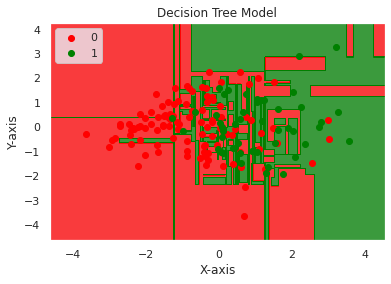

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance= pca.explained_variance_ratio_
#
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='entropy',random_state=0)
classifier.fit(X_train,y_train)
#
Y_pred = classifier.predict(X_test)
#
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2= np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap =ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Decision Tree Model')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

2. **K NEAREST NEIGHBORS CLASSIFIER**

Building and Training the Model.

In [ ]:
X=data.iloc[:,0:8].values
y=data.iloc[:,8].values
#
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)
#
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier_knn.fit(X_train,y_train)

pickle_out = open("classifier_knn.pkl", "wb") 
pickle.dump(classifier_knn, pickle_out) 
pickle_out.close()

Training Completed 

Confusion Matrix

In [ ]:
Y_pred = classifier_knn.predict(X_test)
#
from  sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,Y_pred)
print(cm2)

[[89 18]
 [16 31]]


**ACCURACY, PRECISION, RECALL**

In [ ]:
print("Accuracy of the Model is : ",(cm2[0][0]+cm2[1][1])*100/(cm2[0][0]+cm2[1][1]+cm2[0][1]+cm2[1][0]))
print("Precision of the Model is : ",(cm2[0][0])*100/(cm2[0][0]+cm2[1][0]))
print("Recall of the Model is : ",(cm2[0][0])*100/(cm2[0][0]+cm2[0][1]))

acc_x2 = (cm2[0][0]+cm2[1][1])*100/(cm2[0][0]+cm2[1][1]+cm2[0][1]+cm2[1][0])
pre_x2 = (cm2[0][0])*100/(cm2[0][0]+cm2[1][0])
rec_x2 = (cm2[0][0])*100/(cm2[0][0]+cm2[0][1])

Accuracy of the Model is :  77.92207792207792
Precision of the Model is :  84.76190476190476
Recall of the Model is :  83.17757009345794


**PLOTTING K-NEIGHBORS CLASSIFIER FOR THE DATASET**


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


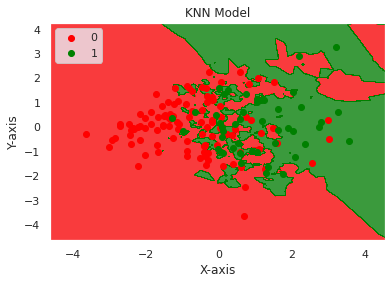

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance= pca.explained_variance_ratio_
#
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
#
Y_pred = classifier.predict(X_test)
#
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2= np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap =ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('KNN Model')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


3. **LOGISTIC REGRESSION**

Building and Training the Model.

In [ ]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,29.0,125.0,32.3,0.232,54,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
X=data.iloc[:,0:8].values
y=data.iloc[:,8].values
#
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
#print(X)
#print(y)
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)
#
'''
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
print("after",X_test)
'''
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression()
classifier_log.fit(X_train,y_train)
#
pickle_out = open("classifier_log.pkl", "wb") 
pickle.dump(classifier_log, pickle_out) 
pickle_out.close()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
X_test=[[  2.,    107.,     74.,     30.,    100.,     33.6,     0.404,  23.,   ],
 [  4.,     76.,     62.,     29.,    125.,     34.,      0.391,  25.,   ],
 [  5.,    166.,     72.,     19.,    175.,     25.8,     0.587,  51.,   ],
 [  0.,    111.,     65.,     29.,    125.,     24.6,     0.66,   31.,   ],
 [  1.,     81.,     72.,     18.,     40.,     26.6,     0.283,  24.,   ],
 [  9.,    152.,     78.,     34.,    171.,     34.2,     0.893,  33.,   ]]

print(X_test)



[[2.0, 107.0, 74.0, 30.0, 100.0, 33.6, 0.404, 23.0], [4.0, 76.0, 62.0, 29.0, 125.0, 34.0, 0.391, 25.0], [5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0], [0.0, 111.0, 65.0, 29.0, 125.0, 24.6, 0.66, 31.0], [1.0, 81.0, 72.0, 18.0, 40.0, 26.6, 0.283, 24.0], [9.0, 152.0, 78.0, 34.0, 171.0, 34.2, 0.893, 33.0]]


In [ ]:
Y_pred = classifier_log.predict(X_test)
print(Y_pred)

[1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [ ]:
 X_test.shape

(154, 8)

Confusion Matrix

In [ ]:
Y_pred = classifier_log.predict(X_test)
print(Y_pred)
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test,Y_pred)
print(cm3)

[1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]
[[95 12]
 [16 31]]


**ACCURACY, PRECISION, RECALL**

In [ ]:
print("Accuracy of the Model is : ",(cm3[0][0]+cm3[1][1])*100/(cm3[0][0]+cm3[1][1]+cm3[0][1]+cm3[1][0]))
print("Precision of the Model is : ",(cm3[0][0])*100/(cm3[0][0]+cm3[1][0]))
print("Recall of the Model is : ",(cm3[0][0])*100/(cm3[0][0]+cm3[0][1]))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Y_pred))

acc_x3 = (cm3[0][0]+cm3[1][1])*100/(cm3[0][0]+cm3[1][1]+cm3[0][1]+cm3[1][0])
pre_x3 = (cm3[0][0])*100/(cm3[0][0]+cm3[1][0])
rec_x3 = (cm3[0][0])*100/(cm3[0][0]+cm3[0][1])

Accuracy of the Model is :  81.81818181818181
Precision of the Model is :  85.58558558558559
Recall of the Model is :  88.78504672897196
0.8181818181818182


**PLOTTING LOGISTIC REGRESSION FOR THE DATASET**

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance= pca.explained_variance_ratio_
#
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
#
Y_pred = classifier.predict(X_test)
#
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2= np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap =ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression Model')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


In [ ]:
import joblib 

def load_model(model_file):
	loaded_model = joblib.load("classifier_log.pkl","rb")
	return loaded_model


feature_list = [-0.54480808, -0.48575468,  0.11279888,  0.08828139, -0.47396847,  0.13914985, -0.1876381,  -0.88240283]
single_sample = np.array(feature_list).reshape(1,-1)
loaded_model = load_model("classifier_log.pkl")
prediction = loaded_model.predict(single_sample)
pred_prob = loaded_model.predict_proba(single_sample)

print(prediction)

4. **NAIVE BAYES**

Building and Training the Model.

In [ ]:
X=data.iloc[:,0:8].values
y=data.iloc[:,8].values
#
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)
#
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.naive_bayes import GaussianNB
classifier_naive = GaussianNB()
classifier_naive.fit(X_train,y_train)
#
pickle_out = open("classifier_naive.pkl", "wb") 
pickle.dump(classifier_naive, pickle_out) 
pickle_out.close()

Training Completed 

Confusion Matrix

In [ ]:
Y_pred = classifier_naive.predict(X_test)
#
from  sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test,Y_pred)
print(cm4)

**ACCURACY, PRECISION, RECALL**

In [ ]:
print("Accuracy of the Model is : ",(cm4[0][0]+cm4[1][1])*100/(cm4[0][0]+cm4[1][1]+cm4[0][1]+cm4[1][0]))
print("Precision of the Model is : ",(cm4[0][0])*100/(cm4[0][0]+cm4[1][0]))
print("Recall of the Model is : ",(cm4[0][0])*100/(cm4[0][0]+cm4[0][1]))

acc_x4 = (cm4[0][0]+cm4[1][1])*100/(cm4[0][0]+cm4[1][1]+cm4[0][1]+cm4[1][0])
pre_x4 = (cm4[0][0])*100/(cm4[0][0]+cm4[1][0])
rec_x4 = (cm4[0][0])*100/(cm4[0][0]+cm4[0][1])

**PLOTTING NAIVE BAYES FOR THE DATASET**

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance= pca.explained_variance_ratio_
#
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
#
Y_pred = classifier.predict(X_test)
#
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2= np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap =ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Naive Bayes Model')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


5. **RANDOM FOREST CLASSIFIER**

Building and Training the Model.

In [ ]:
X=data.iloc[:,0:8].values
y=data.iloc[:,8].values
#
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)
#
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier_random = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
classifier_random.fit(X_train,y_train)
#
pickle_out = open("classifier_random.pkl", "wb") 
pickle.dump(classifier_random, pickle_out) 
pickle_out.close()

Training Completed 

Confusion Matrix

In [ ]:
Y_pred = classifier_random.predict(X_test)

from  sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test,Y_pred)
print(cm5)

**ACCURACY, PRECISION, RECALL**

In [ ]:
print("Accuracy of the Model is : ",(cm5[0][0]+cm5[1][1])*100/(cm5[0][0]+cm5[1][1]+cm5[0][1]+cm5[1][0]))
print("Precision of the Model is : ",(cm5[0][0])*100/(cm5[0][0]+cm5[1][0]))
print("Recall of the Model is : ",(cm5[0][0])*100/(cm5[0][0]+cm5[0][1]))

acc_x5 = (cm5[0][0]+cm5[1][1])*100/(cm5[0][0]+cm5[1][1]+cm5[0][1]+cm5[1][0])
pre_x5 = (cm5[0][0])*100/(cm5[0][0]+cm5[1][0])
rec_x5 = (cm5[0][0])*100/(cm5[0][0]+cm5[0][1])

**PLOTTING RANDOM FOREST
 CLASSIFIER FOR THE DATASET**

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance= pca.explained_variance_ratio_
#
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
#
Y_pred = classifier.predict(X_test)
#
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2= np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap =ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Random Forest Model')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.savefig("rishabh.png")
plt.show()




6. **SVM LINEAR**

Building and Training the Model.

In [ ]:
X=data.iloc[:,0:8].values
y=data.iloc[:,8].values
#
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)
#
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.svm import SVC
classifier_svm = SVC(kernel ='linear', random_state=0, probability = True)
classifier_svm.fit(X_train,y_train)
#
pickle_out = open("classifier_svm.pkl", "wb") 
pickle.dump(classifier_svm, pickle_out) 
pickle_out.close()

Training Completed 

Confusion Matrix

In [ ]:
Y_pred = classifier_svm.predict(X_test)
#
from  sklearn.metrics import confusion_matrix
cm6 = confusion_matrix(y_test,Y_pred)
print(cm6)

**ACCURACY, PRECISION, RECALL**

In [ ]:
print("Accuracy of the Model is : ",(cm6[0][0]+cm6[1][1])*100/(cm6[0][0]+cm6[1][1]+cm6[0][1]+cm6[1][0]))
print("Precision of the Model is : ",(cm6[0][0])*100/(cm6[0][0]+cm6[1][0]))
print("Recall of the Model is : ",(cm6[0][0])*100/(cm6[0][0]+cm6[0][1]))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Y_pred))

acc_x6 = (cm6[0][0]+cm6[1][1])*100/(cm6[0][0]+cm6[1][1]+cm6[0][1]+cm6[1][0])
pre_x6 = (cm6[0][0])*100/(cm6[0][0]+cm6[1][0])
rec_x6 = (cm6[0][0])*100/(cm6[0][0]+cm6[0][1])


**PLOTTING SVM LINEAR FOR THE DATASET**


In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance= pca.explained_variance_ratio_
#
from sklearn.svm import SVC
classifier = SVC(kernel ='linear', random_state=0)
classifier.fit(X_train,y_train)
#
Y_pred = classifier.predict(X_test)
#
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2= np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap =ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('SVM Linear Model')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


**COMAPRISION TABLE FOR ALL THE MACHINE LEARNING ALGORITHM**

In [ ]:
acc = ["Accuracy ", acc_x1, acc_x2, acc_x3, acc_x4, acc_x5, acc_x6]
pre = ["Precision", pre_x1, pre_x2, pre_x3, pre_x4, pre_x5, pre_x6]
rec = ["Recall   ", rec_x1, rec_x2, rec_x3, rec_x4, rec_x5, rec_x6]
ml = ["", "Decision Tree", "KNN", "Logistic Regression", "Naive Bayes", "Random Forest", "SVM"]

a = 5
M = []
for i in range(a):
  b = []
  for j in range(len(ml)):
    if i == 0:
      b.append(ml[j])
    if i == 1:
      b.append("")
    elif i == 2:
      b.append(acc[j])
    elif i == 3:
      b.append(pre[j])
    elif i == 4:
      b.append(rec[j])
  M.append(b)

for i in range(a):
  for j in range(len(ml)):
    if  i == 0:
      print(M[i][j],end = "                 ")
    elif i == 3:
      print(M[i][j], end = "            ")
    else:
      print(M[i][j],end = "          ")
  print()
  print()